Master 2 Bioinformatique 

Auteure : Lauryn Trouillot

Année : 2024 - 2025

# Projet Data science for bioinformatics 

{'Time': [0, 30, 60, 90, 120, 150, 390, 450, 600, 780, 810, 840, 870, 1230, 1500, 1530, 1560, 1590, 1620, 1650, 1740, 2010, 2040, 2190, 2220, 2280, 2760, 2820, 3270, 3300, 3330, 3630, 3960, 4200, 4500, 5670, 6390, 8490, 8550, 8910, 8940, 9570, 9750, 10050], 'Event': ['Patient exit', 'Heart rate monitoring', 'Arterial pressure monitoring', 'Oxygen saturation monitoring', 'BIS monitoring', 'Venous route installation', 'Bair hugger', 'CEFAZOLINE', 'Oxygenation', 'SUFENTANIL', 'PROPOFOL', 'ATRACURIUM', 'Ocular occlusion', 'Intubation', 'SEVOFLURANE', 'Controlled ventilation', 'Oxygen 30%', 'Pulmonar auscultation', 'Intubation ballon presure check', 'Lung volume recruitment', 'Temperature monitoring', 'Pulmonar auscultation', 'Points of support check', 'SEVOFLURANE', 'SUFENTANIL', 'Incision', 'Ubumbilical trocar', 'Pneumoperitoneum inflation', 'ATRACURIUM', 'Pulmonar auscultation', 'Lung volume recruitment', 'Preperitoneal space dissection', 'Spermatic cord dissection', 'Hernia space dissec

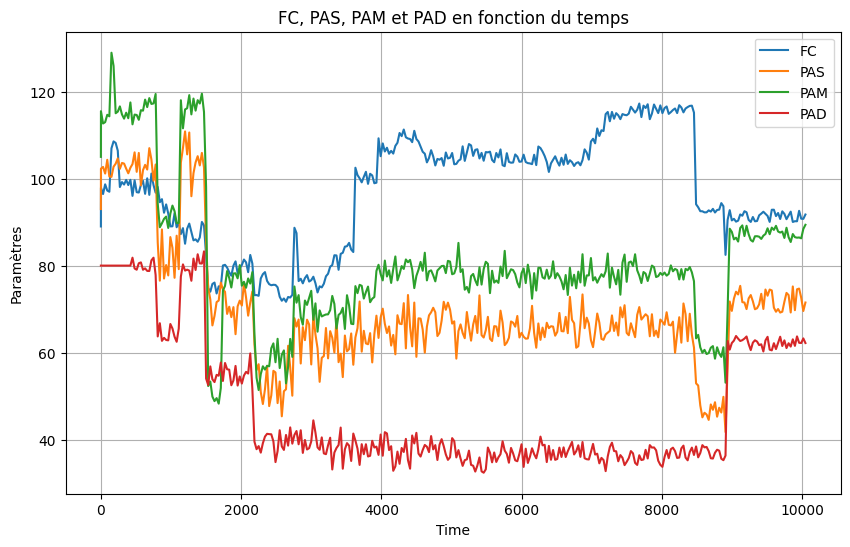

In [1]:
# Impprtation des librairies
import math
import matplotlib.pyplot as plt
from Activite_prep_1 import csv_to_dict
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy
sns.set()

## Partie 1 – Prendre en main d’un jeu de données, nettoyage et curation

1. Importer votre jeu de données dans votre projet python.

In [2]:
# Importation du jeu de données 
water_df = csv_to_dict("/home/lauryn/Datascience/6_water/water/data.csv", ",")

### 1.1 Identification des problèmes éventuels et vérification des types

Le jeu de donnée est composé de 2785 observations, voici les différentes variables observées : 

- **pH**: The pH level of the water.
- **Hardness**: Water hardness, a measure of mineral content.
- **Solids**: Total dissolved solids in the water.
- **Chloramines**: Chloramines concentration in the water.
- **Sulfate**: Sulfate concentration in the water.
- **Conductivity**: Electrical conductivity of the water.
- **Organic_carbon**: Organic carbon content in the water.
- **Trihalomethanes**: Trihalomethanes concentration in the water.
- **Turbidity**: Turbidity level, a measure of water clarity.
- **Potability**: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

The variable to predict is : **Potability**

In [3]:
##  Affichage de quelques lignes 
# Le nombre de ligne a afficher 
nb_ligne = 10

# Noms des colonnes 
for col in water_df.keys() :  
    print(col, end=' | ')
print("\n")

# Affichage des valeurs 
for i in range(nb_ligne) :
    for col in water_df.keys() : 
        valeur = water_df[col][i]
        if valeur == '' :
            print("NA", end= " | ")
        else : 
            print (valeur, end= " | " )
    print("\n")


ph | Hardness | Solids | Chloramines | Sulfate | Conductivity | Organic_carbon | Trihalomethanes | Turbidity | Potability | 

NA | 204.8904554713363 | 20791.318980747026 | 7.300211873184757 | 368.51644134980336 | 564.3086541722439 | 10.3797830780847 | 86.9909704615088 | 2.9631353806316407 | 0 | 

3.71608007538699 | 129.42292051494425 | 18630.057857970347 | 6.635245883862 | NA | 592.8853591348523 | 15.180013116357259 | 56.32907628451764 | 4.500656274942408 | 0 | 

8.099124189298397 | 224.23625939355776 | 19909.541732292393 | 9.275883602694089 | NA | 418.6062130644815 | 16.868636929550973 | 66.42009251176368 | 3.0559337496641685 | 0 | 

8.316765884214679 | 214.37339408562252 | 22018.417440775294 | 8.05933237743854 | 356.88613564305666 | 363.2665161642437 | 18.436524495493302 | 100.34167436508008 | 4.628770536837084 | 0 | 

9.092223456290965 | 181.10150923612525 | 17978.98633892625 | 6.546599974207941 | 310.13573752420444 | 398.41081338184466 | 11.558279443446395 | 31.997992727424737 | 4.

**Stratégie de nettoyage**
Je vais regarder le nombre de valeur manquante si le nombre est faible je pourrais supprimer les observation, sinon je vais regarder la moyenne, la médiane, l'écart-type, la valeur minimale et maximale de chacune des variables : 
- A partir de la moyenne, la médiane et l'écart type je vais pouvoir decider du traitement des valeurs manquantes 
- Les valeurs minimales et maximales vont me permettre d'identifier de potentielle valeur aberrante meme si un représentation graphique serait mieux. 

In [4]:
nb_observation = len(water_df["Hardness"])
print("Nombre d'observation total : " + str(nb_observation))
na = False
nb_na = 0
for i in range(nb_observation) :
    for col in water_df.keys() : 
        valeur = water_df[col][i]
        if valeur == '' :
            na = True
    if na : 
        nb_na += 1 
    na = False

print ("Le nombre d'observation incomplète : " + str(nb_na))

Nombre d'observation total : 3276
Le nombre d'observation incomplète : 1265


Plus d'un tier des données ont des observations manquantes 

In [5]:
# Importation du jeu de données 
water_df = np.array(list(water_df.values()))
water_df = np.where(water_df == '', None, water_df)
water_df = water_df.astype(object)
water_df = np.where(water_df == None, np.nan, water_df)
water_df = water_df.astype(float).transpose()

colnames = ["ph" , "Hardness" , "Solids", "Chloramines" , "Sulfate" , "Conductivity" , "Organic_carbon" , "Trihalomethanes" , "Turbidity" , "Potability"]
water_df.shape

(3276, 10)

In [6]:
water_df

array([[           nan, 2.04890455e+02, 2.07913190e+04, ...,
        8.69909705e+01, 2.96313538e+00, 0.00000000e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        5.63290763e+01, 4.50065627e+00, 0.00000000e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        6.64200925e+01, 3.05593375e+00, 0.00000000e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        6.98454003e+01, 3.29887550e+00, 1.00000000e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        7.74882131e+01, 4.70865847e+00, 1.00000000e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        7.86984463e+01, 2.30914906e+00, 1.00000000e+00]], shape=(3276, 10))

In [7]:
np.count_nonzero(np.isnan(water_df))

1434

In [8]:
def print_stats(tableau) : 
    ''' 
    '''
    for col in range(tableau.shape[1]) : 
        moyenne = np.nanmean(tableau[:, col])
        mediane = np.nanmedian(tableau[:, col])
        ec = np.nanstd(tableau[:, col])
        min_col = np.nanmin(tableau[:, col])
        max_col = np.nanmax(tableau[:, col])
        print(f"Colonne {colnames[col]}: Moyenne = {moyenne}, Médiane = {mediane}, Écart-type = {ec}, Valeur minimum = {min_col}, Valeur maximal = {max_col}")

print_stats(water_df)

Colonne ph: Moyenne = 7.080794504276835, Médiane = 7.036752103833548, Écart-type = 1.5940332597032338, Valeur minimum = 0.0, Valeur maximal = 13.999999999999998
Colonne Hardness: Moyenne = 196.36949601730154, Médiane = 196.96762686363073, Écart-type = 32.87474281466433, Valeur minimum = 47.432, Valeur maximal = 323.124
Colonne Solids: Moyenne = 22014.092526077104, Médiane = 20927.833606520187, Écart-type = 8767.23242117998, Valeur minimum = 320.942611274359, Valeur maximal = 61227.19600771213
Colonne Chloramines: Moyenne = 7.122276793425786, Médiane = 7.130298973883081, Écart-type = 1.5828432520255509, Valeur minimum = 0.3520000000000003, Valeur maximal = 13.127000000000002
Colonne Sulfate: Moyenne = 333.77577661081347, Médiane = 333.073545745888, Écart-type = 41.408539661817485, Valeur minimum = 129.00000000000003, Valeur maximal = 481.03064230599716
Colonne Conductivity: Moyenne = 426.20511068255325, Médiane = 421.88496828005435, Écart-type = 80.81172732448097, Valeur minimum = 181.4

Pour gerer les valeurs manquantes je vais utiliser le coefficient de variation : 
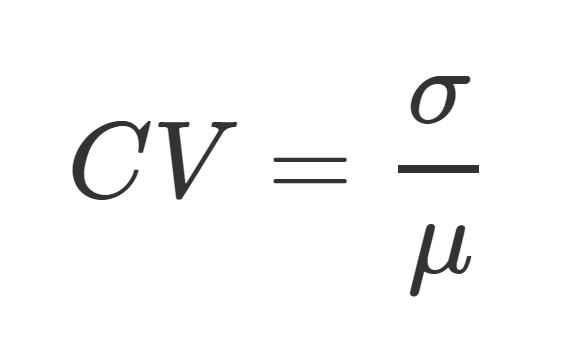
Etant sur des données biologiques il y a un plus grands risque de variabilité ainsi j'infererais la moyenne pour les observations manquantes ayant un CV inferieur a 0.3 
Pour les variables ayant un CV superieur je supprimerais les observations.  


Identification des variables catégorielles 

In [9]:
# Fonction pour identifier les valeurs categorielles 
def is_categorical(liste):
    '''
    docstring a faire 
    '''
    categorical = False
    types_uniques = set(type(element) for element in liste)
    categorical = (str in types_uniques or bool in types_uniques) or ((int in types_uniques or float in types_uniques) and len(set(liste)) <= 10)
    if categorical : 
        return set(element for element in liste)
    else : 
        return categorical

# Fonction pour identifier les valeurs continues 
def is_continuous(liste):
    if is_categorical(liste) == False : 
        return set(type(element) for element in liste)
    else :
        print("Cette variable n'est pas continue ")
        return False

# Fonction pour identifier les valeurs categorielles 
def categorical_or_continuous(liste):
    '''
    docstring a faire 
    '''
    categorical = False
    types_uniques = set(type(element) for element in liste)
    categorical = (str in types_uniques or bool in types_uniques) or ((int in types_uniques or float in types_uniques) and len(set(liste)) <= 10)
    if categorical : 
        return set(element for element in liste)
    else : 
        return set(type(element) for element in liste)

Verifions les variables de water_df

In [10]:
for col in range(water_df.shape[1]) : 
    print(f"Colonne {colnames[col]}: ")
    print(categorical_or_continuous(water_df[:, col].tolist()))
          

Colonne ph: 
{<class 'float'>}
Colonne Hardness: 
{<class 'float'>}
Colonne Solids: 
{<class 'float'>}
Colonne Chloramines: 
{<class 'float'>}
Colonne Sulfate: 
{<class 'float'>}
Colonne Conductivity: 
{<class 'float'>}
Colonne Organic_carbon: 
{<class 'float'>}
Colonne Trihalomethanes: 
{<class 'float'>}
Colonne Turbidity: 
{<class 'float'>}
Colonne Potability: 
{0.0, 1.0}


### 1.2 Outillage

Les types ont l'air bon
Je vais creer la fonction de nettoyage de mon jeu de données 

In [11]:
def clean_data(numpy_table):
    '''
    docstring
    '''
    table_copy = np.copy(numpy_table)
    print("Avant nettoyage : ")
    print(f"Info tableau : {table_copy.shape}")
    for col in range(table_copy.shape[1]) : 
        if is_categorical != False : 
            moyenne = np.nanmean(table_copy[:, col])
            ec = np.nanstd(table_copy[:, col])
            CV = ec / moyenne
            if CV < 0.3 : 
                table_copy[:, col] = np.nan_to_num(table_copy[:, col], nan=moyenne)
    
    table_copy = table_copy[~np.isnan(table_copy).any(axis=1)]
    print("Après nettoyage : ")
    print(f"Info tableau : {table_copy.shape}")
    np.savetxt('data_CV30.csv', table_copy, delimiter=",", header=",".join(colnames), comments='')

    return table_copy

# Utilisation
cleaned_data = clean_data(water_df)


Avant nettoyage : 
Info tableau : (3276, 10)
Après nettoyage : 
Info tableau : (3276, 10)


Si une variable numérique contient en réalité un petit nombre de valeurs différentes, il suffit de convertir la classe de l’objet de numeric vers factor. Si, par contre, le nombre de valeurs différentes est important (dizaines ou plus) alors il va falloir créer des regroupements. C’est le découpage en classes abordé plus loin.

Il existe des normes pour les parametres de qualité de l'eau on peut les utiliser pour definir nos catégories : 
- **pH**
    - Entre 0 et 6,5 : eau acide
    - Entre 6,5 et 8,5 : eau potable
    - Entre 8,5 et 14 : eau basique

- **Dureté (TH)**
    - 0 - 5°f : eau très douce
    - 5 - 10°f : eau douce
    - 10 - 20°f : eau moyennement dure
    - 20 - 30°f : eau dure
    - 30°f : eau très dure

- **Solides dissous totaux**
    - < 300 mg/L : eau de faible minéralisation
    - 300 - 600 mg/L : eau de minéralisation moyenne
    - 600 mg/L : eau fortement minéralisée

- **Chloramines**
    - < 0,5 mg/L : niveau acceptable
    - 0,5 - 1 mg/L : niveau modéré
    - 1 mg/L : niveau élevé

- **Sulfates**
    - < 250 mg/L : concentration acceptable
    - 250 mg/L : concentration élevée

- **Conductivité**
    - < 200 µS/cm : faible minéralisation
    - 200 - 1000 µS/cm : minéralisation moyenne
    - 1000 µS/cm : forte minéralisation

- **Carbone organique**
    - < 2 mg/L : faible teneur
    - 2 - 4 mg/L : teneur moyenne
    - 4 mg/L : teneur élevée

- **Trihalométhanes**
    - < 80 µg/L : concentration acceptable
    - 80 µg/L : concentration élevée

- **Turbidité**
    - < 1 UNT : eau claire
    - 1 - 5 UNT : eau légèrement trouble
    - 5 UNT : eau trouble visible à l'œil nu

In [12]:
def continu_to_cate(numpy_table, liste_col):
    ''' 
    '''
    table_copy = np.copy(numpy_table).astype(object)
    for col in liste_col : 
        if col == 0:  # pH
            conditions = [
                (table_copy[:, col] >= 0) & (table_copy[:, col] < 6.5),
                (table_copy[:, col] >= 6.5) & (table_copy[:, col] < 8.5),
                (table_copy[:, col] >= 8.5) & (table_copy[:, col] <= 14)
            ]
            choices = ["Acide", "Neutre", "Basique"]
            table_copy[:, col] = np.select(conditions, choices, default="pH out of range")
        elif col == 1:  # Hardness
            conditions = [
                (table_copy[:, col] >= 0) & (table_copy[:, col] < 5),
                (table_copy[:, col] >= 5) & (table_copy[:, col] < 10),
                (table_copy[:, col] >= 10) & (table_copy[:, col] < 20),
                (table_copy[:, col] >= 20) & (table_copy[:, col] < 30),
                (table_copy[:, col] >= 30)
            ]
            choices = ["Tres douce", "Douce", "Moyennement dure", "Dure", "Tres dure"]
            table_copy[:, col] = np.select(conditions, choices, default="Hardness out of range")
        elif col == 2:  # Solids
            conditions = [
                (table_copy[:, col] < 300),
                (table_copy[:, col] >= 300) & (table_copy[:, col] < 600),
                (table_copy[:, col] >= 600)
            ]
            choices = ["Faible mineralisation", "Mineralisation moyenne", "Forte mineralisation"]
            table_copy[:, col] = np.select(conditions, choices, default="Solids out of range")
        elif col == 3:  # Chloramines
            conditions = [
                (table_copy[:, col] < 0.5),
                (table_copy[:, col] >= 0.5) & (table_copy[:, col] < 1),
                (table_copy[:, col] >= 1)
            ]
            choices = ["Acceptable", "Moderee", "Elevee"]
            table_copy[:, col] = np.select(conditions, choices, default="Chloramines out of range")
        elif col == 4:  # Sulfate
            conditions = [
                (table_copy[:, col] < 250),
                (table_copy[:, col] >= 250)
            ]
            choices = ["Acceptable", "Elevee"]
            table_copy[:, col] = np.select(conditions, choices, default="Sulfate out of range")
        elif col == 5:  # Conductivity
            conditions = [
                (table_copy[:, col] < 200),
                (table_copy[:, col] >= 200) & (table_copy[:, col] < 1000),
                (table_copy[:, col] >= 1000)
            ]
            choices = ["Faible", "Moyen", "Fort"]
            table_copy[:, col] = np.select(conditions, choices, default="Conductivity out of range")
        elif col == 6:  # Organic_carbon
            conditions = [
                (table_copy[:, col] < 2),
                (table_copy[:, col] >= 2) & (table_copy[:, col] < 4),
                (table_copy[:, col] >= 4)
            ]
            choices = ["Faible", "Moyen", "Fort"]
            table_copy[:, col] = np.select(conditions, choices, default="Organic_carbon out of range")
        elif col == 7:  # Trihalomethanes
            conditions = [
                (table_copy[:, col] < 80),
                (table_copy[:, col] >= 80)
            ]
            choices = ["Acceptable", "Elevee"]
            table_copy[:, col] = np.select(conditions, choices, default="Trihalomethanes out of range")
        elif col == 8:  # Turbidity
            conditions = [
                (table_copy[:, col] < 1),
                (table_copy[:, col] >= 1) & (table_copy[:, col] < 5),
                (table_copy[:, col] >= 5)
            ]
            choices = ["Eau clair", "Eau légerement trouble", "Eau trouble"]
            table_copy[:, col] = np.select(conditions, choices, default="Turbidity out of range")
        else:
            print("Cette colonne n'existe pas")
    return table_copy


Pour transformer des variables catégorielle en variable continue on peut simplement convertir les chaines de caractère en nombre 
Dans mon jeu de donnée c'est deja fait 

### 1.3 La stérilisation en python

In [13]:
import pickle

# Sterilisation du fichier 
with open ("water_30.pkl", 'wb') as fichier : 
    pickle.dump(cleaned_data, fichier)

In [14]:
#Déstérilisation de l'objet 
with open("water_30.pkl", 'rb') as fichier : 
    water_30 = pickle.load(fichier)

water_30

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        8.69909705e+01, 2.96313538e+00, 0.00000000e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        5.63290763e+01, 4.50065627e+00, 0.00000000e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        6.64200925e+01, 3.05593375e+00, 0.00000000e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        6.98454003e+01, 3.29887550e+00, 1.00000000e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        7.74882131e+01, 4.70865847e+00, 1.00000000e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        7.86984463e+01, 2.30914906e+00, 1.00000000e+00]], shape=(3276, 10))

## Partie 2 : Analyses


In [15]:
water_20 = pd.read_csv("data_CV20.csv", usecols = ["ph" , "Hardness" , "Solids", "Chloramines" , "Sulfate" , "Conductivity" , "Organic_carbon" , "Trihalomethanes" , "Turbidity"])
water_30 = pd.read_csv("data_CV30.csv", usecols = ["ph" , "Hardness" , "Solids", "Chloramines" , "Sulfate" , "Conductivity" , "Organic_carbon" , "Trihalomethanes" , "Turbidity"])

In [16]:
water_20

ph    Hardness        Solids  Chloramines     Sulfate  \
0     3.716080  129.422921  18630.057858     6.635246  333.775777   
1     8.099124  224.236259  19909.541732     9.275884  333.775777   
2     8.316766  214.373394  22018.417441     8.059332  356.886136   
3     9.092223  181.101509  17978.986339     6.546600  310.135738   
4     5.584087  188.313324  28748.687739     7.544869  326.678363   
...        ...         ...           ...          ...         ...   
2644  6.069616  186.659040  26138.780191     7.747547  345.700257   
2645  4.668102  193.681735  47580.991603     7.166639  359.948574   
2646  9.419510  175.762646  33155.578218     7.350233  333.775777   
2647  5.126763  230.603758  11983.869376     6.303357  333.775777   
2648  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       592.885359       15.180013        56.329076   4.500656  
1       418.606213       16.868637        66.420093   3.055934  
2       363.266516       18.436524       100.341674   4.628771  
3       398.410813       11.558279        31.997993   4.075075  
4       280.467916        8.399735        54.917862   2.559708  
...            ...             ...              ...        ...  
2644    415.886955       12.067620        60.419921   3.669712  
2645    526.424171       13.894419        66.687695   4.435821  
2646    432.044783       11.039070        69.845400   3.298875  
2647    402.883113       11.168946        77.488213   4.708658  
2648    327.459760       16.140368        78.698446   2.309149  

[2649 rows x 9 columns]

### 2.1 Analyses graphiques

#### 2.1.1 istribution univariée 

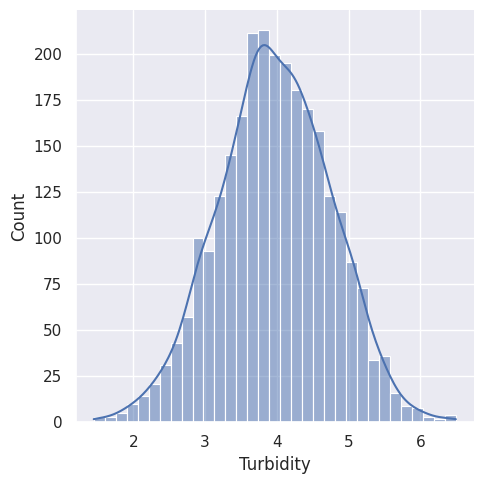

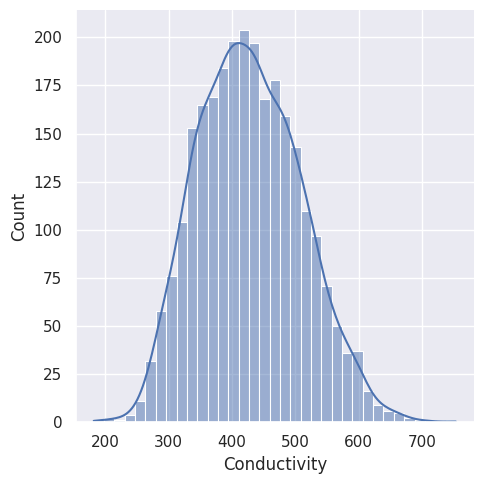

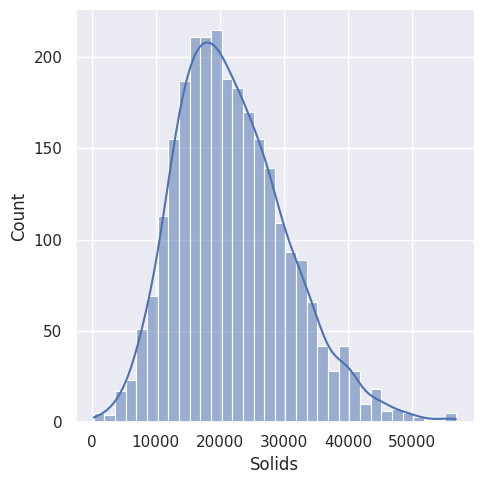

In [17]:
sns.displot(water_20.Turbidity, kde=True)
sns.displot(water_20.Conductivity, kde=True)
sns.displot(water_20.Solids, kde=True)

#### 2.1.2 Distribution bivariée 

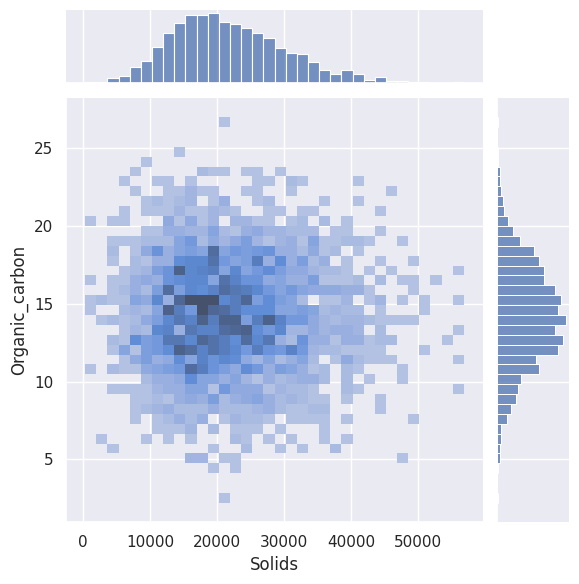

In [18]:
sns.jointplot(x=water_20.Solids,y=water_20.Organic_carbon, kind="hist")

#### 2.1.3 Visualisation des relations par paires 

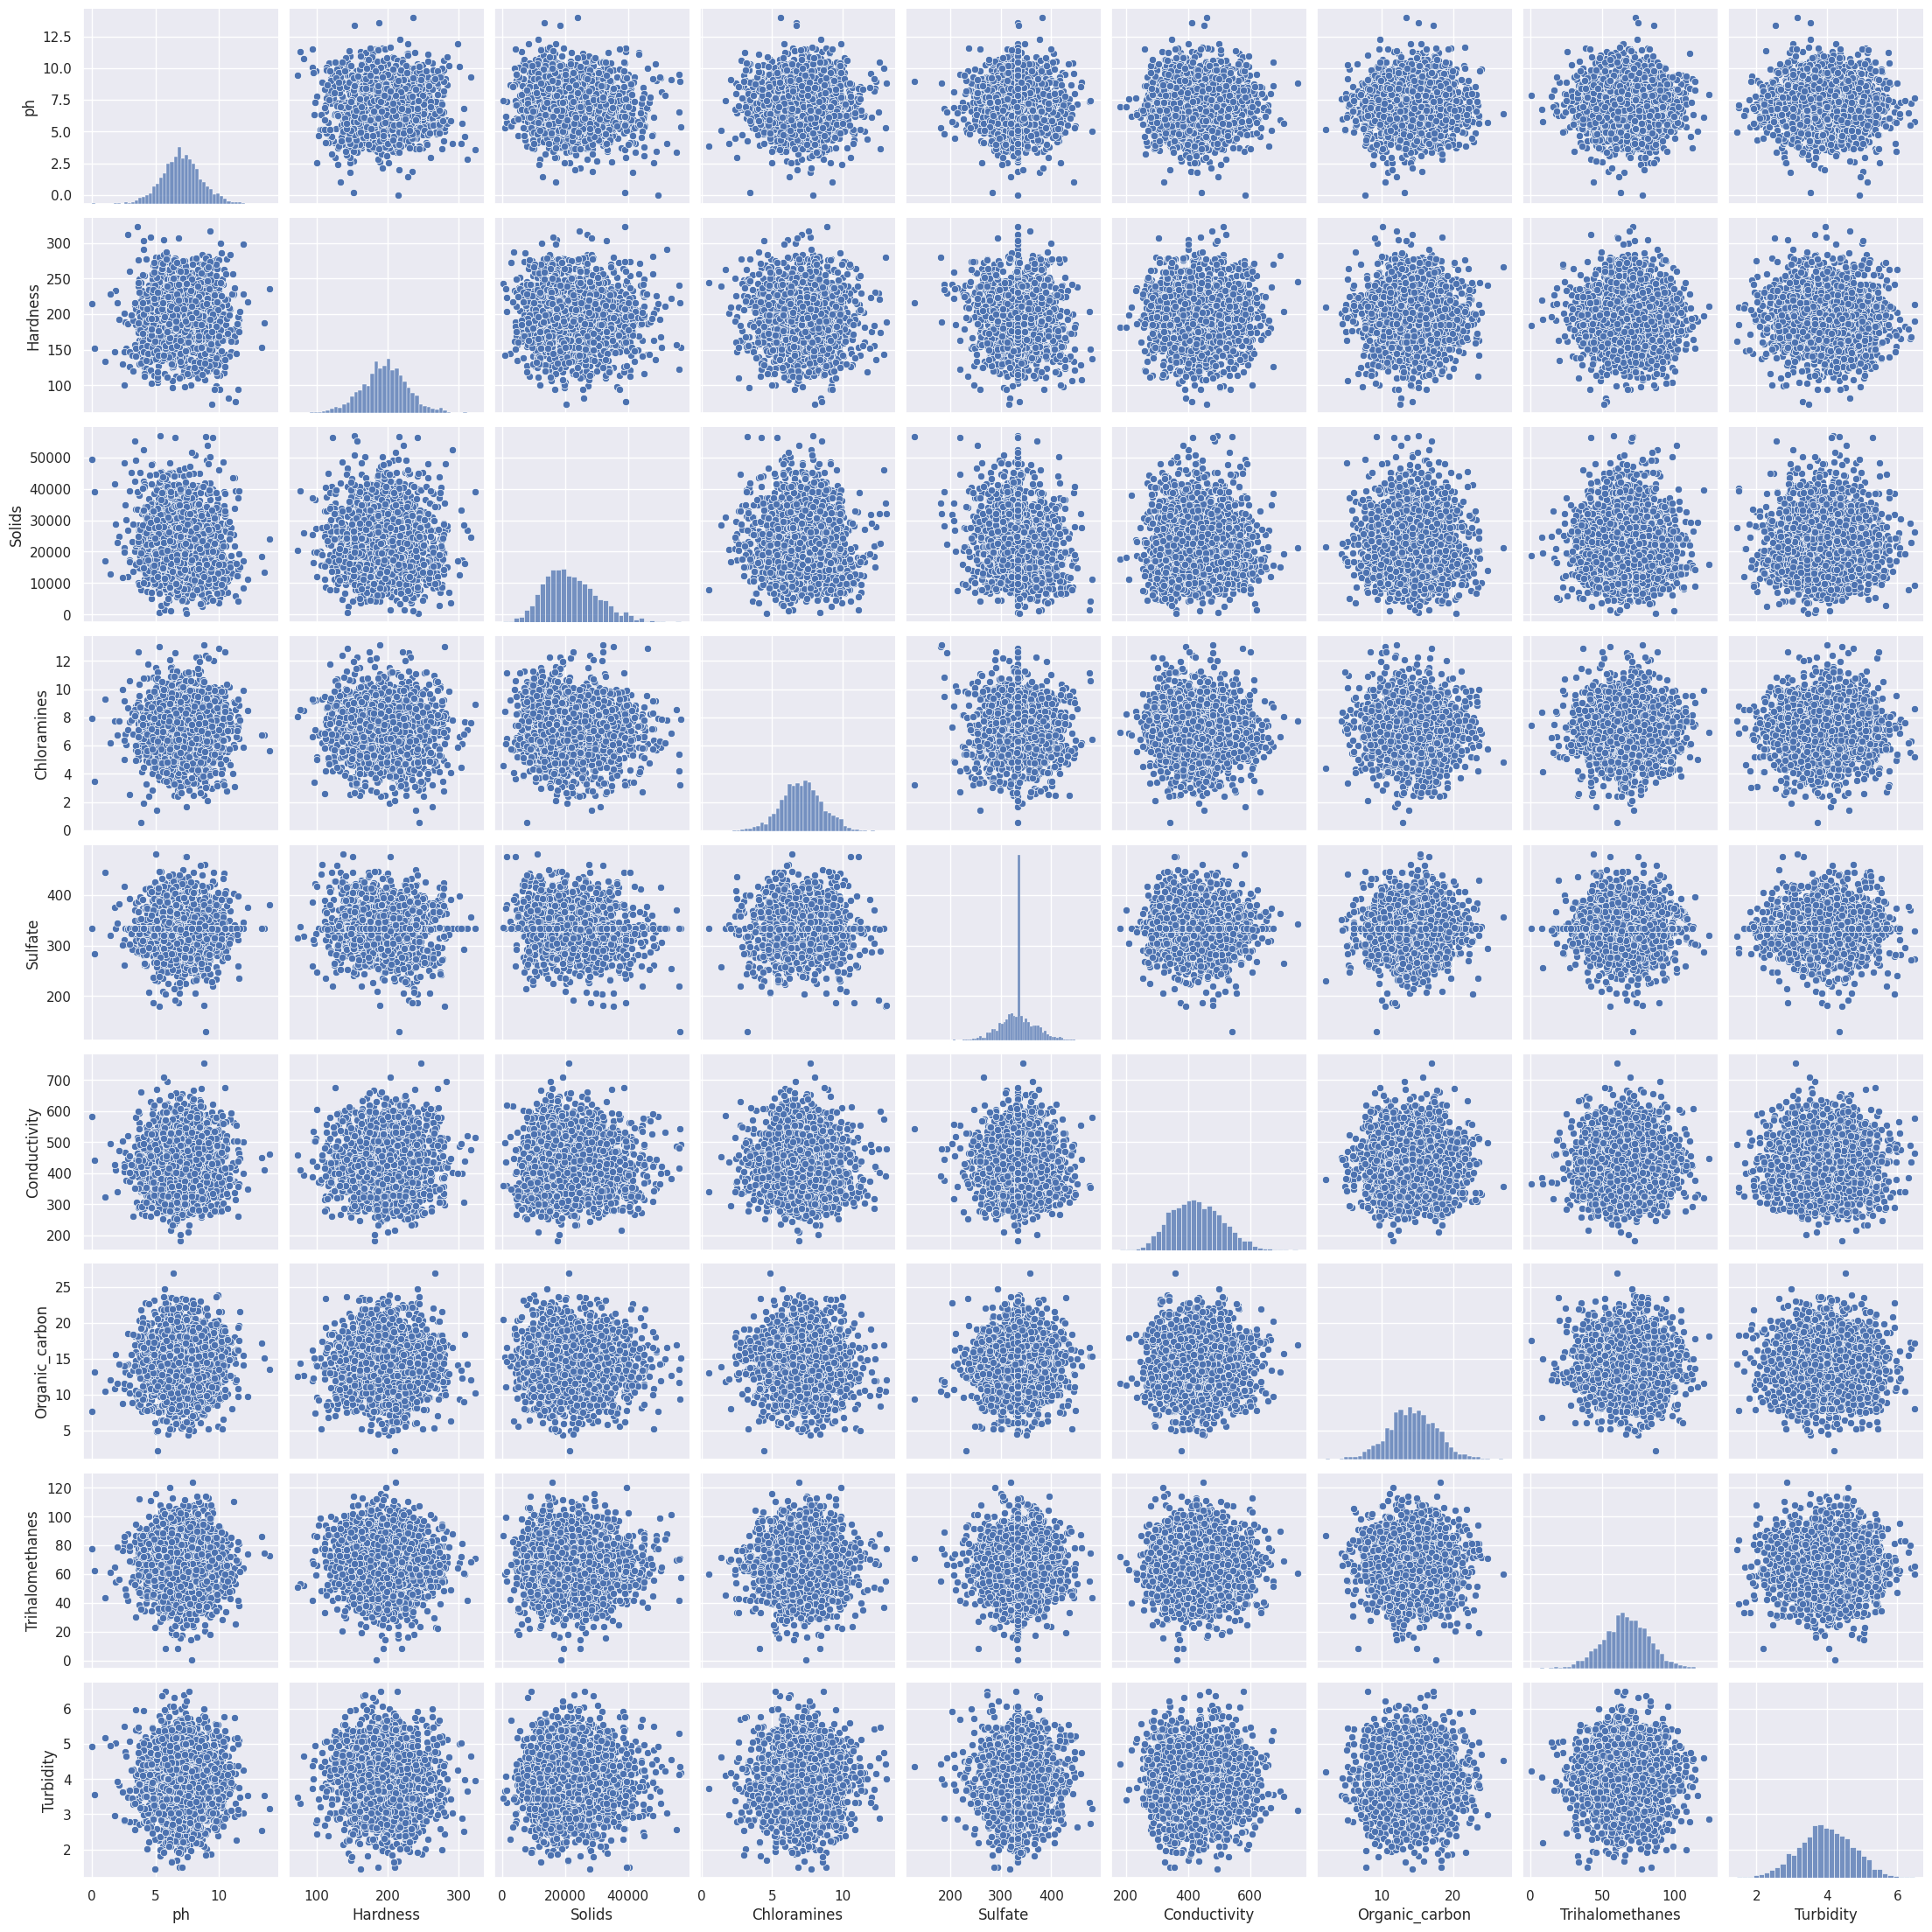

In [19]:
sns.pairplot(water_20, diag_kind="hist")

#### 2.1.4 Données categorielles 

Cette représentation graphique concerne les données catégorielles, dans mon jeu de données uniquement la variable d'interet est categorielle. Cette représentation n'est pas nécessaire 

#### 2.1.5 Heatmap 

<Axes: >

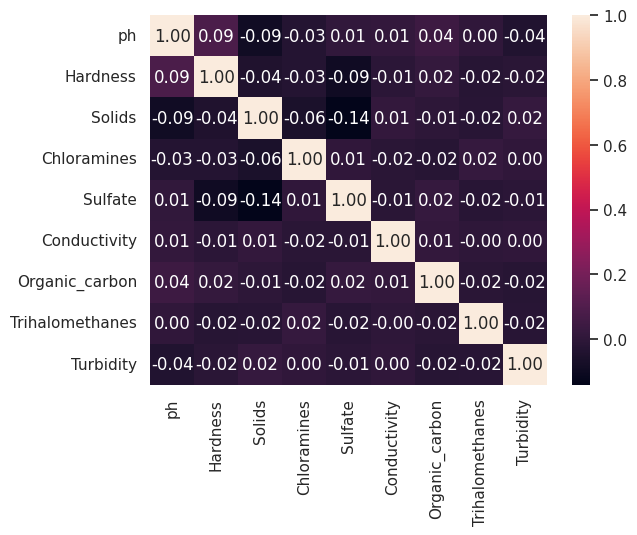

In [20]:
water_20_corr = water_20.corr()
sns.heatmap(water_20_corr, annot=True, fmt=".2f")

### 2.2 Analyses statistiques et descriptives  

In [21]:
water_20 = np.genfromtxt('data_CV20.csv', delimiter=',')
water_20 = water_20[~np.isnan(water_20).any(axis=1)]
water_20 = np.delete(water_20, 9, axis=1)
water_20


array([[3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       [8.31676588e+00, 2.14373394e+02, 2.20184174e+04, ...,
        1.84365245e+01, 1.00341674e+02, 4.62877054e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]], shape=(2649, 9))

In [22]:
print_stats(water_20)

Colonne ph: Moyenne = 7.080149389109656, Médiane = 7.038092305552901, Écart-type = 1.5842383139350875, Valeur minimum = 0.0, Valeur maximal = 13.999999999999998
Colonne Hardness: Moyenne = 196.33452138535787, Médiane = 197.19183941740528, Écart-type = 32.88594910843199, Valeur minimum = 73.4922336890611, Valeur maximal = 323.124
Colonne Solids: Moyenne = 21923.811170285626, Médiane = 20852.764496168482, Écart-type = 8690.800406592562, Valeur minimum = 320.942611274359, Valeur maximal = 56867.859236154436
Colonne Chloramines: Moyenne = 7.127004672821007, Médiane = 7.121263608584251, Écart-type = 1.5860108175673218, Valeur minimum = 0.5303512946996154, Valeur maximal = 13.127000000000002
Colonne Sulfate: Moyenne = 333.3574030375975, Médiane = 333.77577661081347, Écart-type = 35.8936927585522, Valeur minimum = 129.00000000000003, Valeur maximal = 481.03064230599716
Colonne Conductivity: Moyenne = 427.58839548731004, Médiane = 424.00349933319154, Écart-type = 81.08843240147432, Valeur mini

#### 2.2.1 Corrélation 

In [23]:
def coef_corr(tableau) :
    for col1 in range(tableau.shape[1]) : 
        for col2 in range(tableau.shape[1]) : 
            if col1 != col2 :
                correlation = np.corrcoef(tableau[:, col1], tableau[:, col2])[0, 1]
                if ( -1 < correlation < -0.5 ) or (0.5 < correlation < 1) : 
                    print(f"{colnames[col1]} et {colnames[col2]} sont fortement corrélés.")
                with open('correlation_coefficients.csv', 'a') as f:
                    f.write(f"{colnames[col1]},{colnames[col2]},{correlation}\n")

coef_corr(water_20)


#### 2.2.2 Identification des règles d'agglomérations 

### 2.3 Agglomeration 

#### 2.3.1 Clustering - Classification non supervisée 


In [24]:
## Normalisation 

from sklearn.preprocessing import StandardScaler

object= StandardScaler()
water_20_norm = object.fit_transform(water_20)
water_20_norm

np.savetxt('water_20_norm.csv', water_20_norm, delimiter=",", header=",".join(colnames[:-1]), comments='')

In [25]:
from scipy.spatial import distance

observation1 = water_20_norm[0, :]
observation2 = water_20_norm[1, :]

eucli = distance.euclidean(observation1, observation2)
manha = distance.cityblock(observation1, observation2)
mink = distance.minkowski(observation1, observation2)

cov_matrix = np.cov(water_20_norm, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix, )
mahala = distance.mahalanobis(observation1, observation2, inv_cov_matrix)


print(f"La distance euclidienne : {eucli}")
print(f"La distance Manhattan : {manha}")
print(f"La distance Minkowski : {mink}")
print(f"La distance Mahalanobis : {mahala}")


La distance euclidienne : 5.239864167119789
La distance Manhattan : 12.596369112082135
La distance Minkowski : 5.239864167119789
La distance Mahalanobis : 5.147036122669526


p determine comment les différences entre les dimensions sont pondérées, plus p est grand plus la distance est influencé par les plus grandes différences entre les dimensions 

La matrice inversée de mahalanobis permet de normaliser les données en tenant comptes des correlations entre les dimensions.


Selon les graphiques précédent les variables présentent une distribution normale, en générale la distance euclidienne et approprié pour ce type de variable. Sachant que le seuil dépend de la distance que nous allons employer. 
Je vais réaliser une matrice de distance et regarder la moyenne des distance pour définir un seuil au tour de la moyenne. 

In [26]:
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(water_20_norm, metric="euclidean")

distance_matrix.mean()

np.float64(4.100065112553091)

La moyenne est de 4,10 je vais donc fixer un seuil a 4 

**La classification hierarchique**
La fonction `plot_dendrogram` vient de : https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

Nombre de clusters formé 258


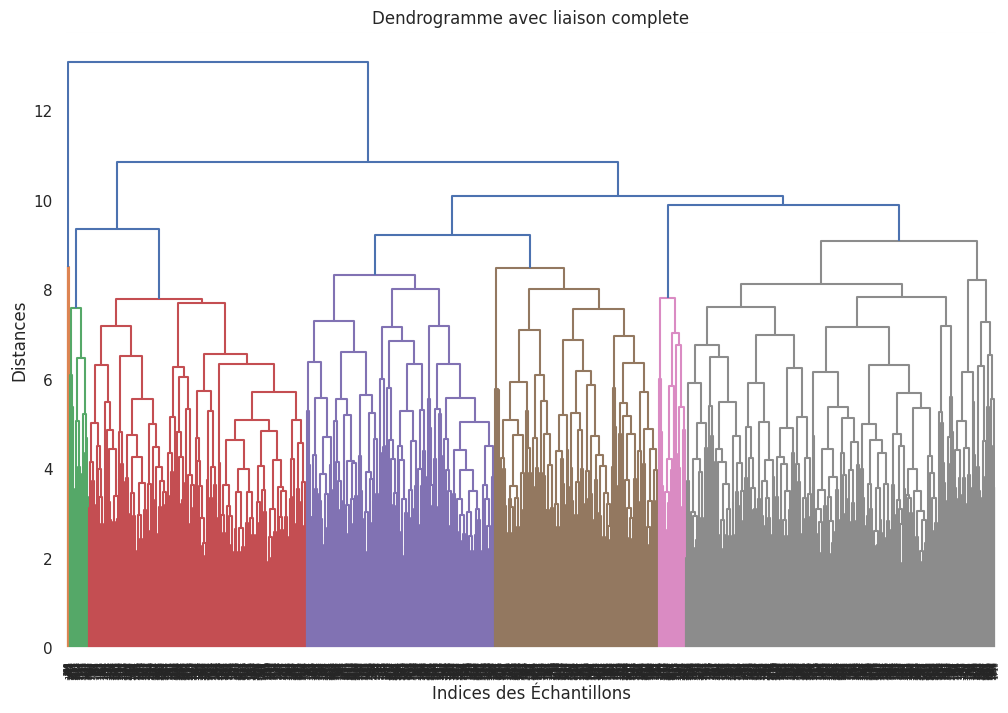

Nombre de clusters formé 74


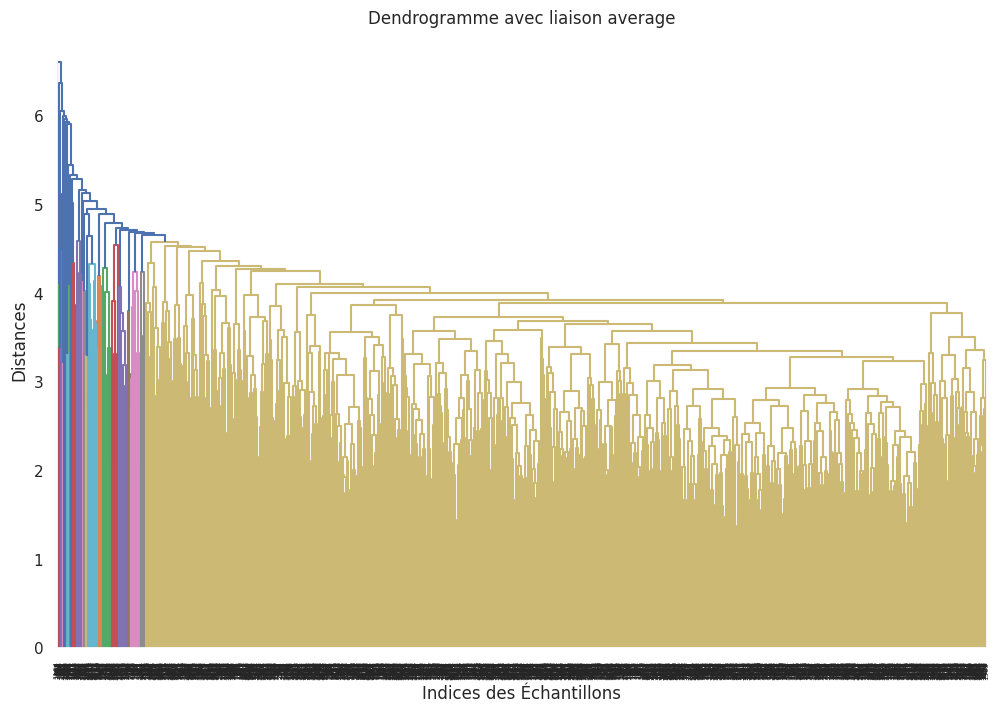

Nombre de clusters formé 2


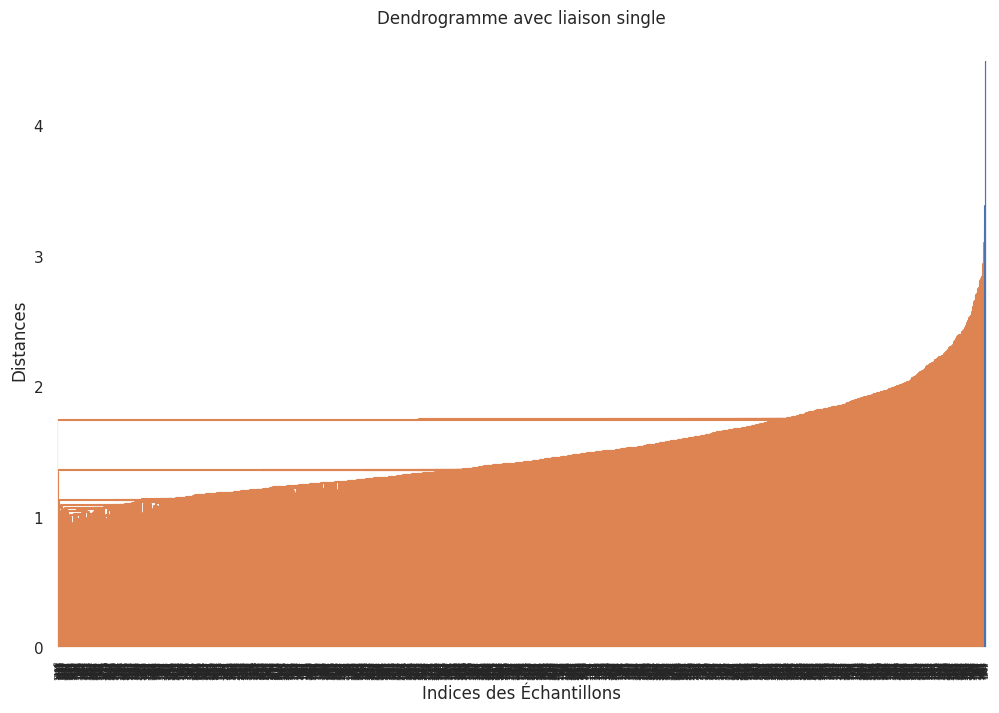

In [27]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

linkage = ["complete","average", "single"]
seuil = 4

for link in linkage : 
    cluster = AgglomerativeClustering(
        metric="euclidean",
        linkage=link,
        distance_threshold=seuil,
        n_clusters=None,
        ).fit(water_20_norm)
    
    labels = cluster.labels_
    nb_clusters = np.unique(labels).shape[0]
    print(f'Nombre de clusters formé {nb_clusters}')
    plt.figure(figsize=(12, 8)) 
    plot_dendrogram(cluster)
    plt.title(f'Dendrogramme avec liaison {link}')
    plt.xlabel('Indices des Échantillons')
    plt.ylabel('Distances')
    plt.show()




Au seuil de 4 les différentes liaisons donne des résultats différents la liaison complete crée 258 clusters, tandis que 74 sont formé avec la liaison average et 2 pour la liason single sur une total de 2649 observations.
Les différences dans le nombre de clusters formés par chaque méthode de liaison suggèrent que vos données ont une structure complexe. Car pour une meme seuil le nombre cluster varie beaucoup. 
Sachant que nous souhaitons discrimer l'eau potable de l'eau non potable on souhaite avoir 2 groupe distincts. 
Je décidé de ne pas préciser le nombre de clusters car dans tout les cas les 2 clusters seront produit meme si les données de permettent pas d'identifier 2 groupes distincts, le seuil et les différents type de liaison nous montre que les données sont complexes 

In [28]:
cluster = AgglomerativeClustering(
        metric="euclidean",
        linkage='complete',
        distance_threshold=seuil,
        n_clusters=None
        ).fit(water_20_norm)

# Sterilisation du fichier 
with open ("AHC_complete.pkl", 'wb') as fichier : 
    pickle.dump(cluster, fichier)

**K-means**
Les différents paramètres : 
- `n_clusters` : Le nombre de clusters à former (= K)
    - Je vais faire varier le nombre de cluster de 2 à 258 et ensuite je vais faire une analyse de silhouette pour identifier le meilleur K, selon l'objectif de l'étude le meilleur K devrait etre 2  
- `init` : Méthode d'initialisation des centroïdes.
    - Utilisation de k-means++ car cela augmente la convergence 
- `n_init` : Nombre d'exécutions de l'algorithme K-means avec différentes graines
    - Utilisation de auto pour assigner le bon nombre d'itération 
- `max_iter` : Nombre maximum d'itérations de l'algorithme K-means pour une seule exécution.
    - On laisse le nombre d'itération par default, soit 300 

Adapatation du script : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


In [29]:
# Ajout de la variable d'Interet 
from sklearn.preprocessing import StandardScaler

water_20 = np.genfromtxt('data_CV20.csv', delimiter=',')
water_20 = water_20[~np.isnan(water_20).any(axis=1)]

scaler = StandardScaler()
normalized_data = scaler.fit_transform(water_20[:, :-1])
last_column_labels = np.where(water_20[:, -1] == 0, 0, 1).reshape(-1, 1)
water_20_norm_pota = np.hstack((normalized_data, last_column_labels))

For n_clusters = 2 The average silhouette_score is : 0.08044329575245555
For n_clusters = 16 The average silhouette_score is : 0.0763450410650566
For n_clusters = 50 The average silhouette_score is : 0.07290282812071743
For n_clusters = 74 The average silhouette_score is : 0.07132643678607123
For n_clusters = 258 The average silhouette_score is : 0.0785996951695715


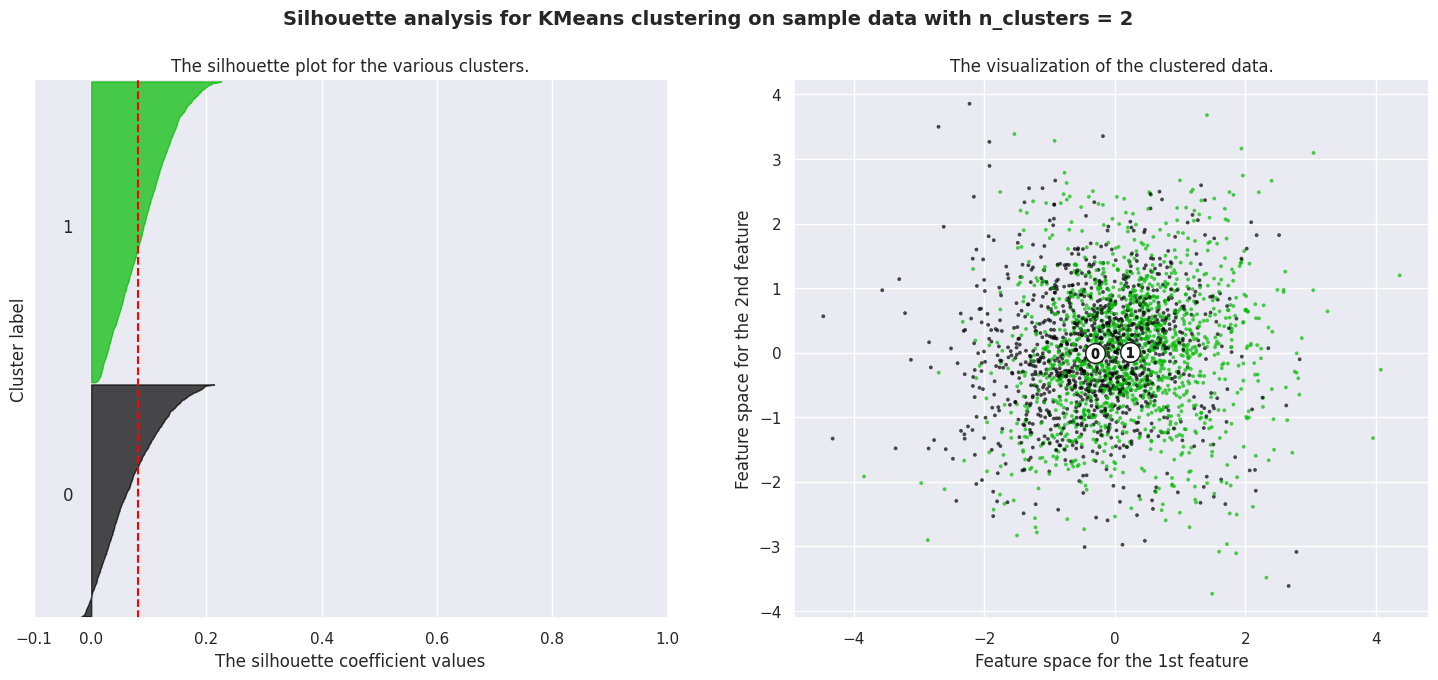

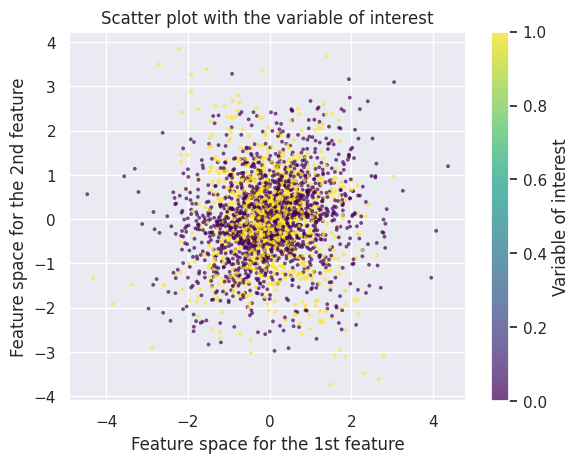

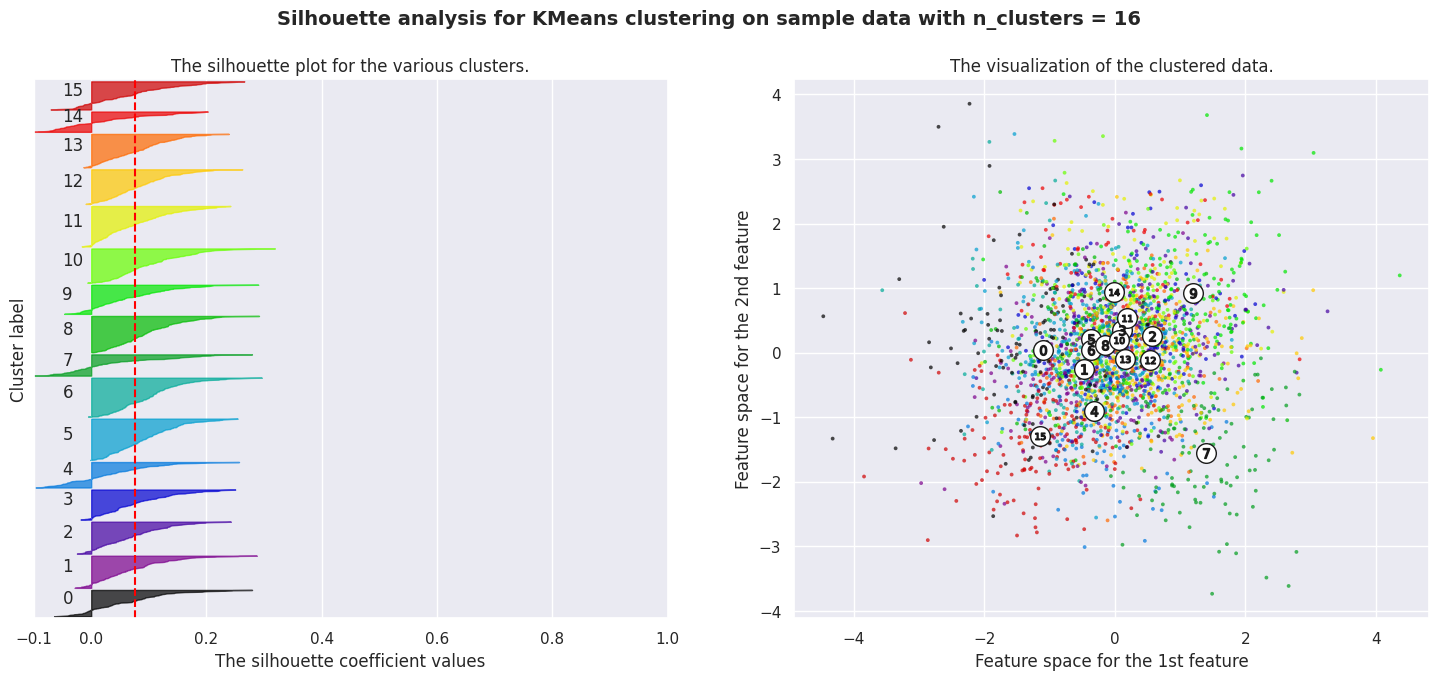

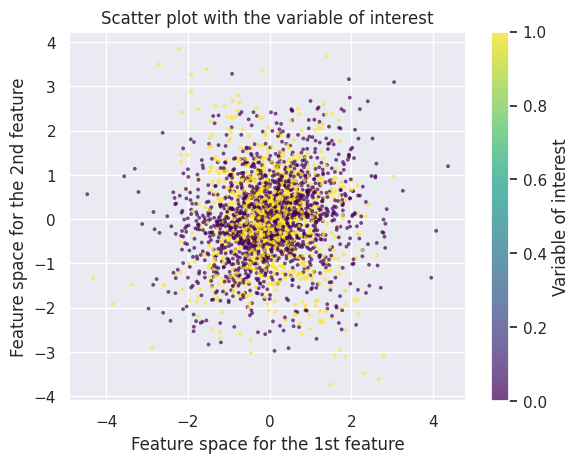

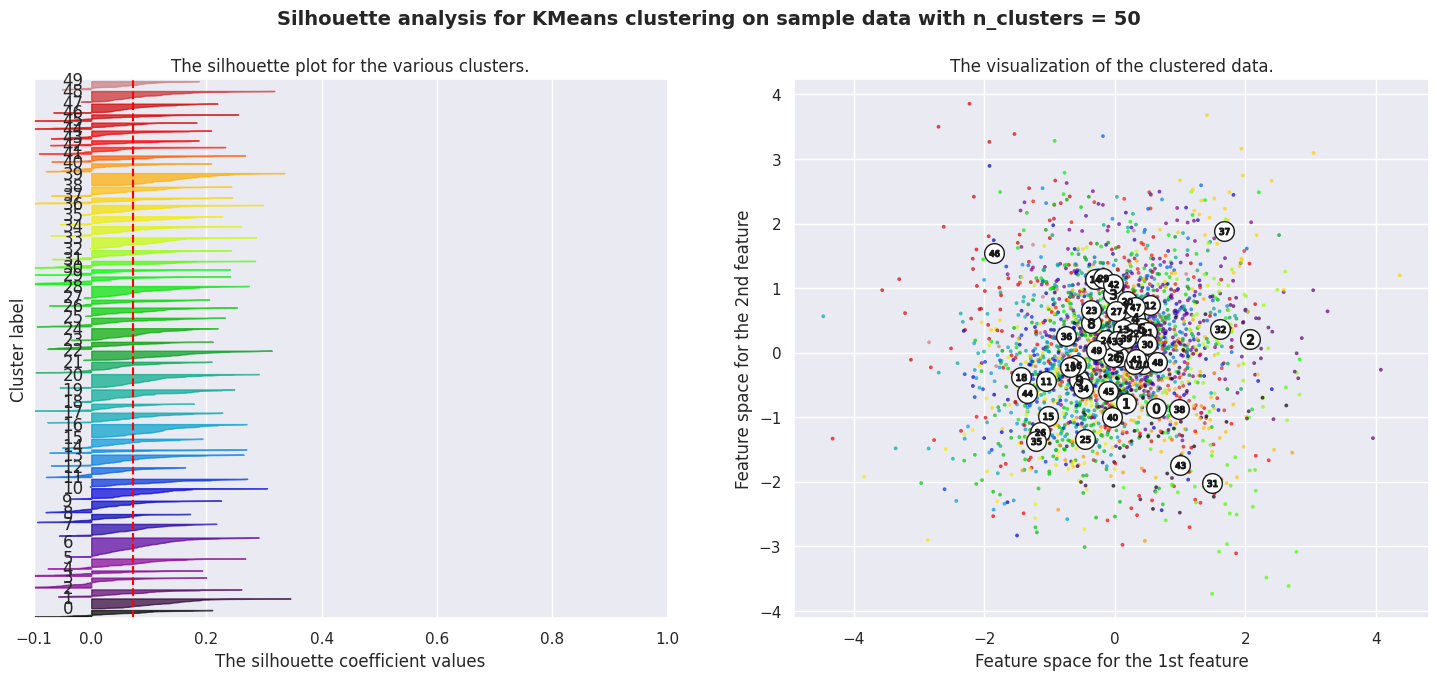

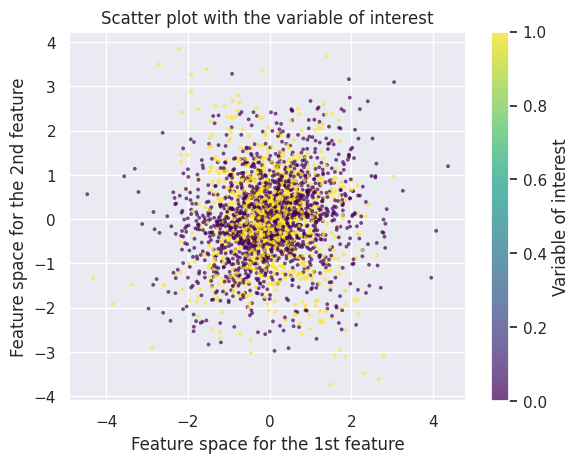

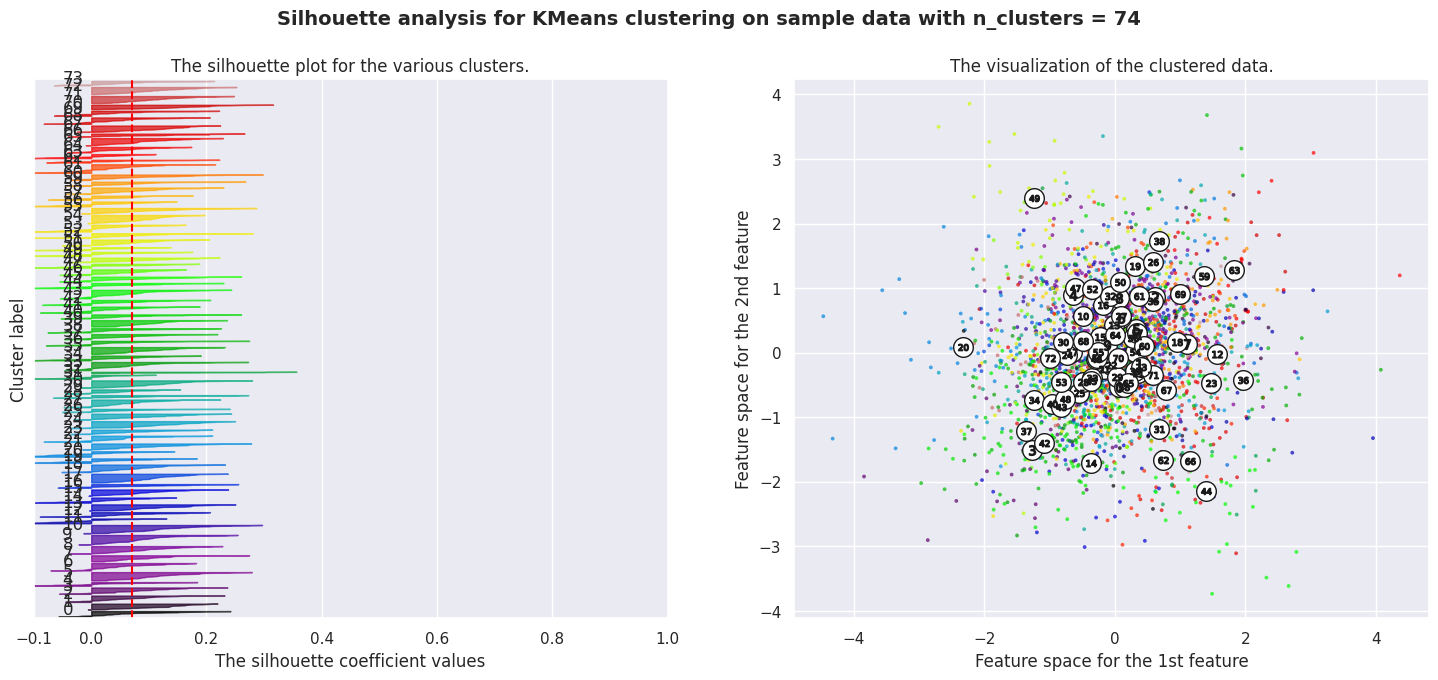

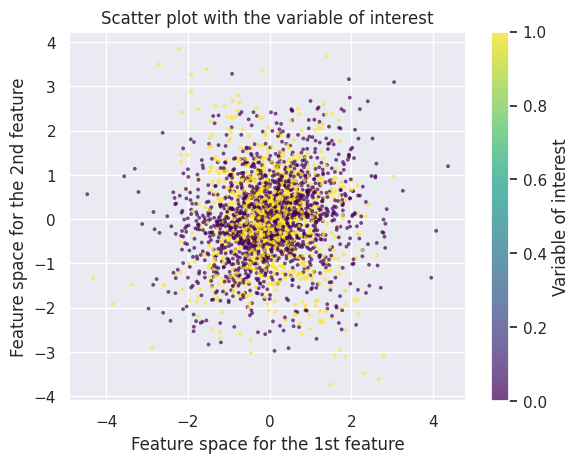

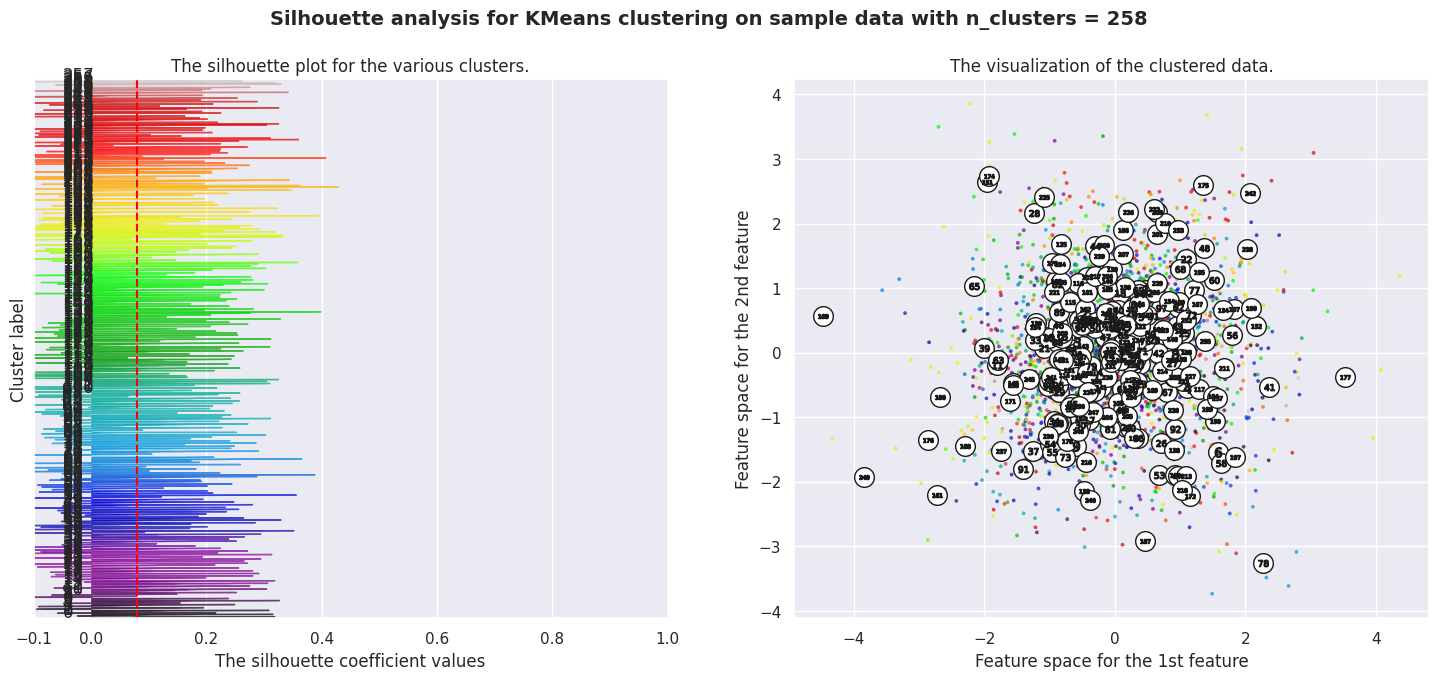

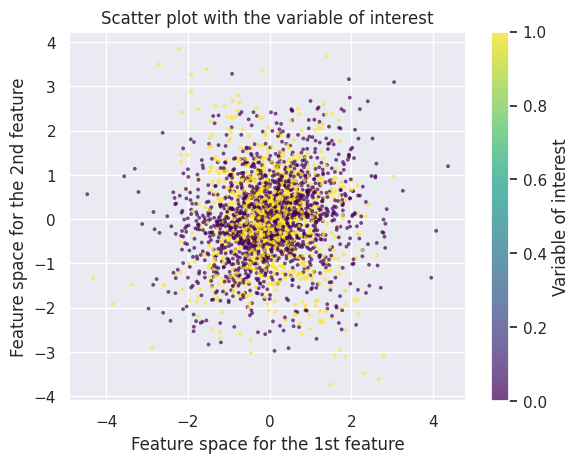

In [30]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

train_data = water_20_norm_pota[:, :-1]


range_n_clusters = [2, 16, 50, 74, 258]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(train_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(train_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(train_data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(train_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        train_data[:, 0], train_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    # Figure avec la variable d'interet
    plt.figure()
    plt.scatter(
        water_20_norm_pota[:, 0], water_20_norm_pota[:, 1], c=water_20_norm_pota[:, -1], cmap='viridis', marker=".", s=30, lw=0, alpha=0.7, edgecolor="k"
    )
    plt.title("Scatter plot with the variable of interest")
    plt.xlabel("Feature space for the 1st feature")
    plt.ylabel("Feature space for the 2nd feature")
    plt.colorbar(label='Variable of interest')

plt.show()

+1 : Indique que le point est bien assigné à son cluster.
0 : Indique que le point est à la limite entre deux clusters.
-1 : Indique que le point est probablement mal assigné à son cluster.

Plus on augmente le nombre de cluster et plus le score silhouette augmente ce qui est logique car on tend a creer des groupe de plus en plus petit et donc des clusters tres spécifiques

In [31]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(train_data[:, :-1])

# Sterilisation du fichier 
with open ("K-means_2.pkl", 'wb') as fichier : 
    pickle.dump(cluster_labels, fichier)

**Les SOM**

Définitions des paramètres : 
- x et y pour determiner la dimension de la grille SOM on va utiliser la règle empirique, avec la regle empirique on obtient 257, je peux donc tester avec une grille carrée de 16x16 (256 neuronnes) mais également avec des grilles rectangulaire de 13x20 (260 neuronnes) ou de 17x15 (255 neuronnes)
- `input_len` : C'est le nombre d'élément dans les vecteurs d'entrées dans notre cas nous avons 10 variable dont la variable d'interet ainsi les l'input sera les 9 autres variables
- Pour la distance, je choisis l'euclidienne car nous sommes toujours sur des données distribué normalement deplus les autres analyse ont été réalisé a partir de la distance euclidienne pour pouvoir comparer les différentes analyses il peut etre interessant de conserver la meme distance. 
- Pour les autres valeurs je laisse les variables par default

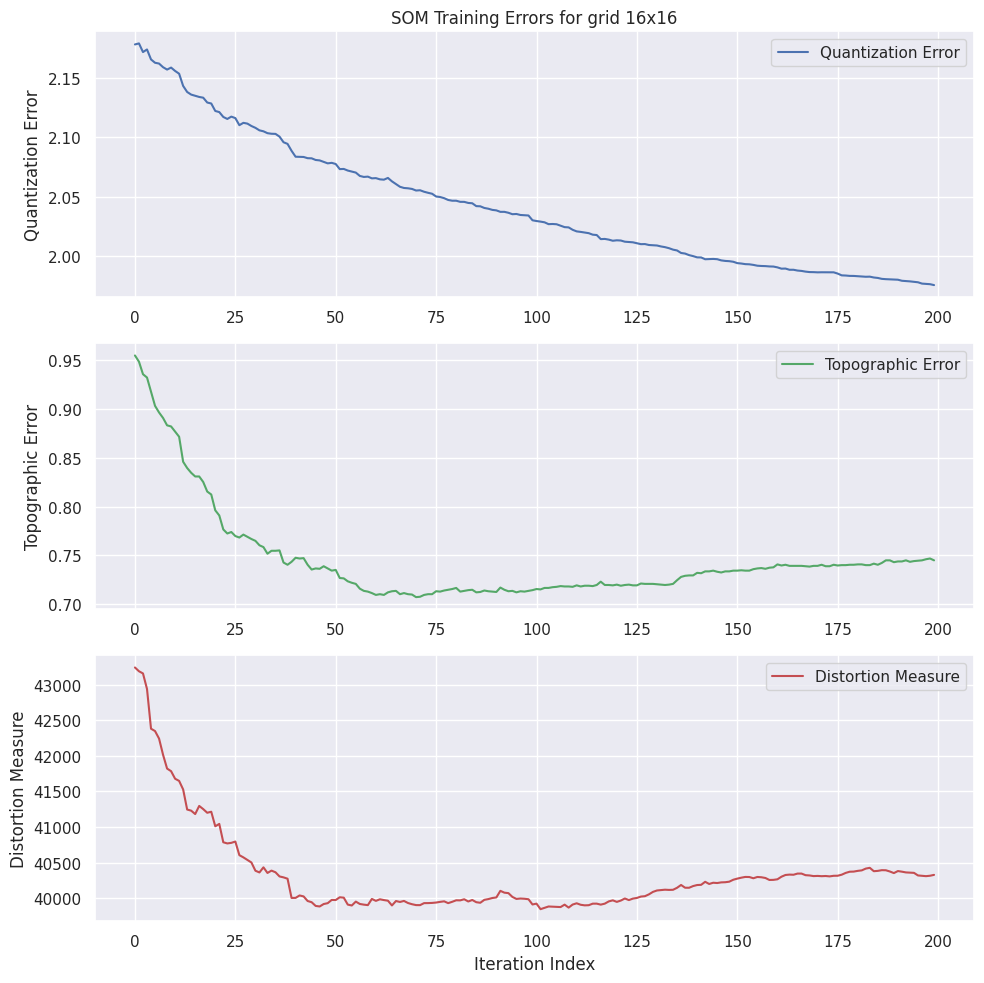

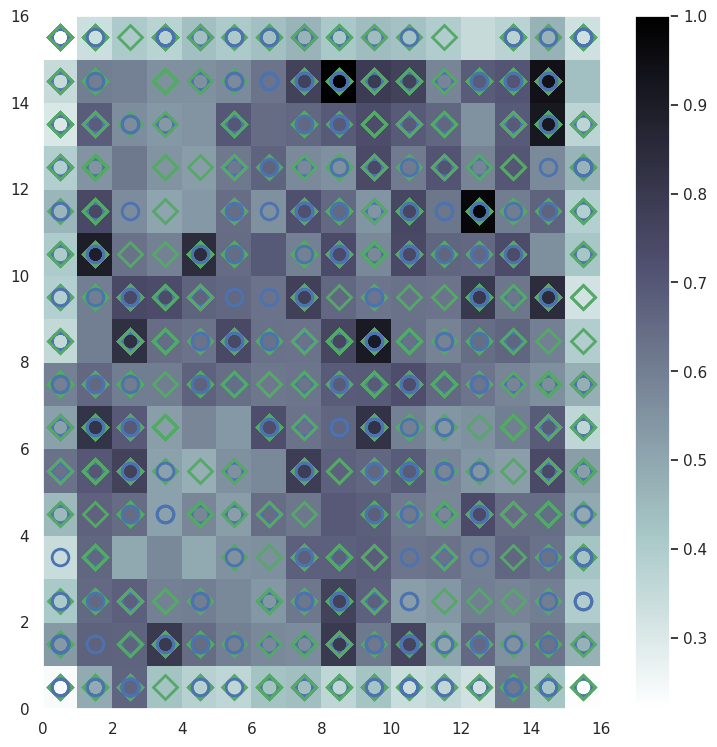

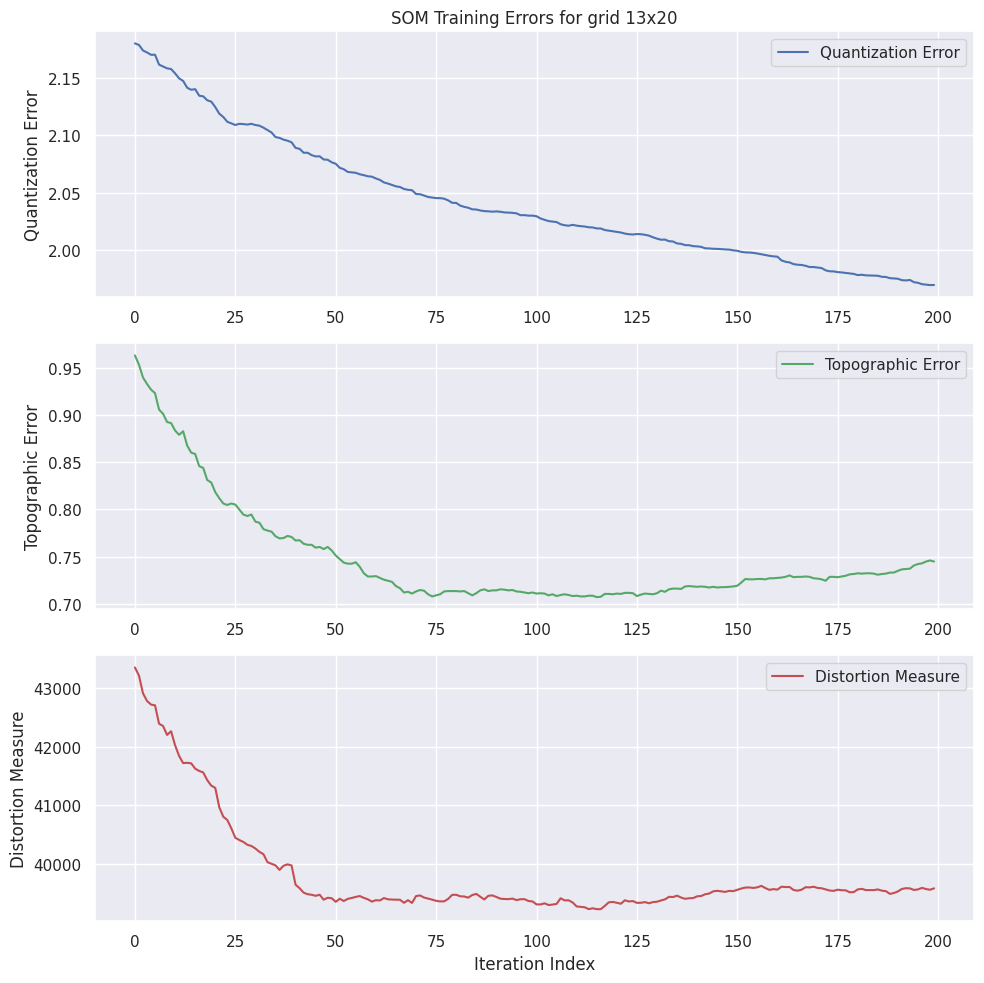

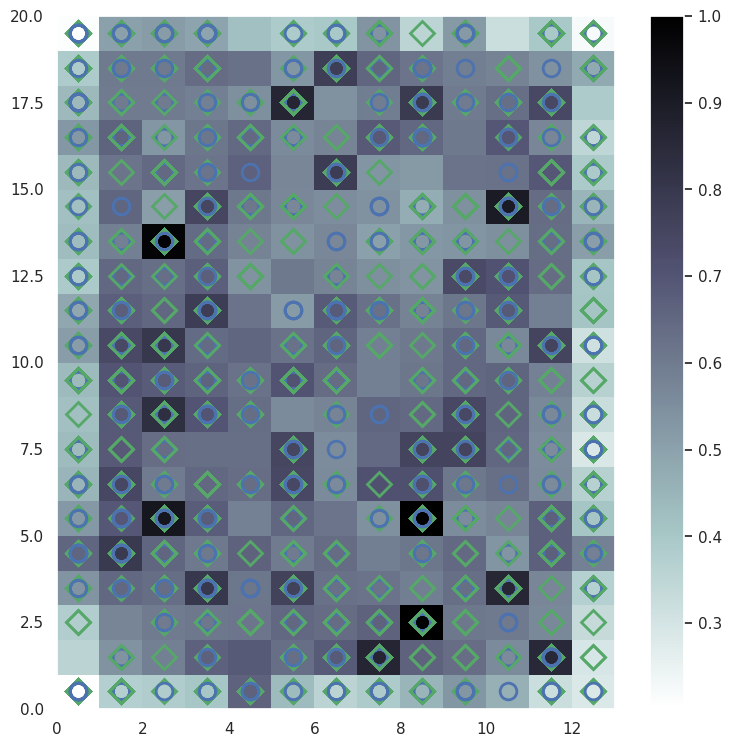

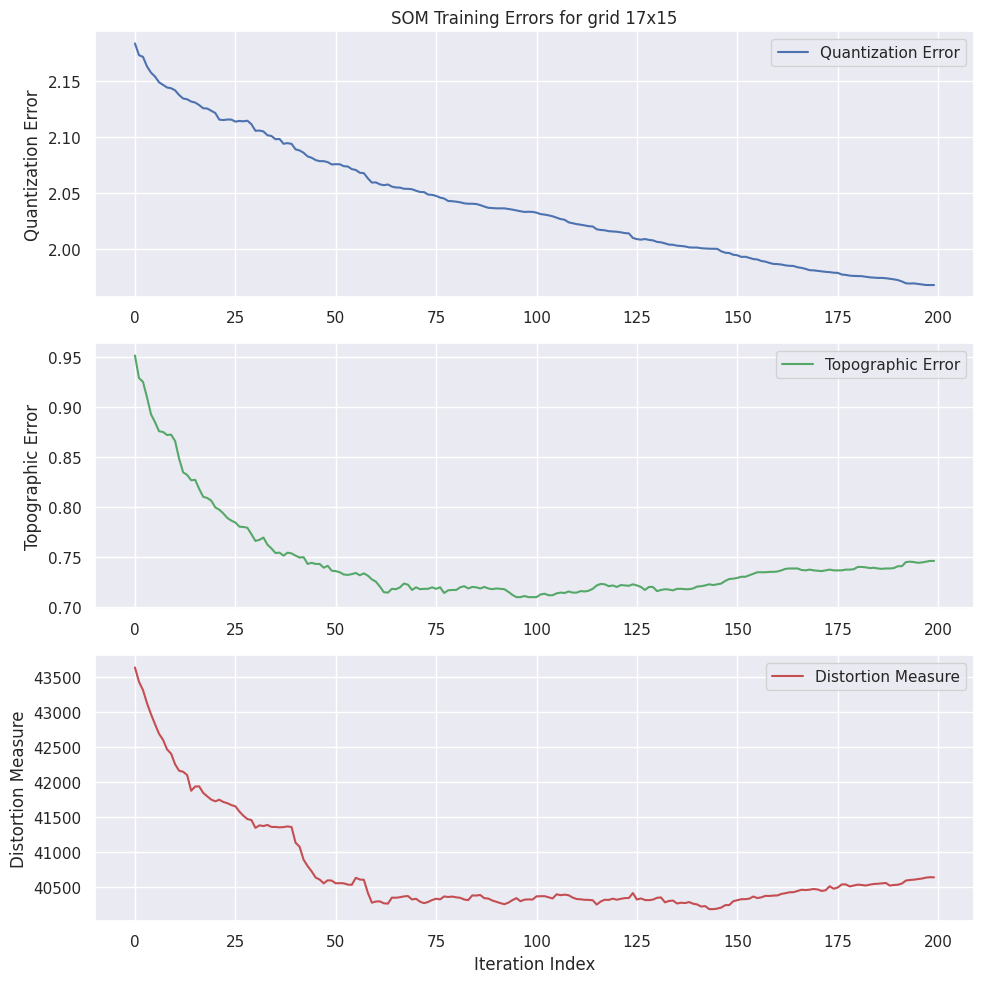

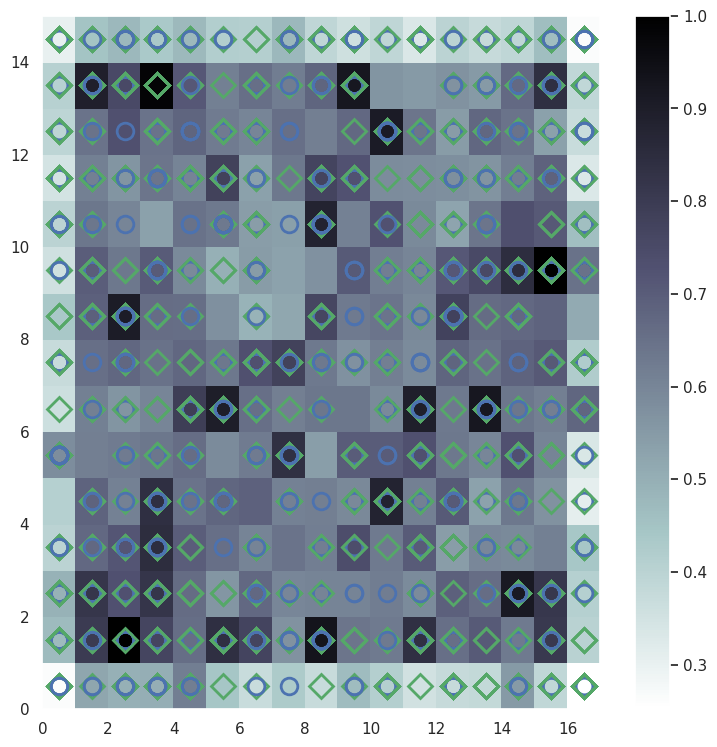

In [32]:
from minisom import MiniSom 

target = water_20_norm_pota[:, -1].astype(int)

modalites = [
    {'x': 16, 'y': 16},
    {'x': 13, 'y': 20},
    {'x': 17, 'y': 15}
]

for mod in modalites: 
    som = MiniSom(x=mod['x'], y=mod['y'], input_len=train_data.shape[1])

    max_iter = 200
    q_error = []
    t_error = []
    d_error = []

    for i in range(max_iter):
        rand_i = np.random.randint(len(train_data))
        som.update(train_data[rand_i], som.winner(train_data[rand_i]), i, max_iter)
        q_error.append(som.quantization_error(train_data))
        t_error.append(som.topographic_error(train_data))
        d_error.append(som.distortion_measure(train_data))

    plt.figure(figsize=(10, 10)) 
    plt.subplot(3, 1, 1)
    plt.plot(np.arange(max_iter), q_error, label='Quantization Error', color='b')
    plt.title(f'SOM Training Errors for grid {mod["x"]}x{mod["y"]}')
    plt.ylabel('Quantization Error')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(np.arange(max_iter), t_error, label='Topographic Error', color='g')
    plt.ylabel('Topographic Error')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(np.arange(max_iter), d_error, label='Distortion Measure', color='r')
    plt.ylabel('Distortion Measure')
    plt.xlabel('Iteration Index')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(9, 9))
    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar()
    markers = ['o', 's', 'D']
    colors = ['C0', 'C1', 'C2']
    for cnt, xx in enumerate(train_data):
        w = som.winner(xx)
        plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
                 markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)
    plt.show()


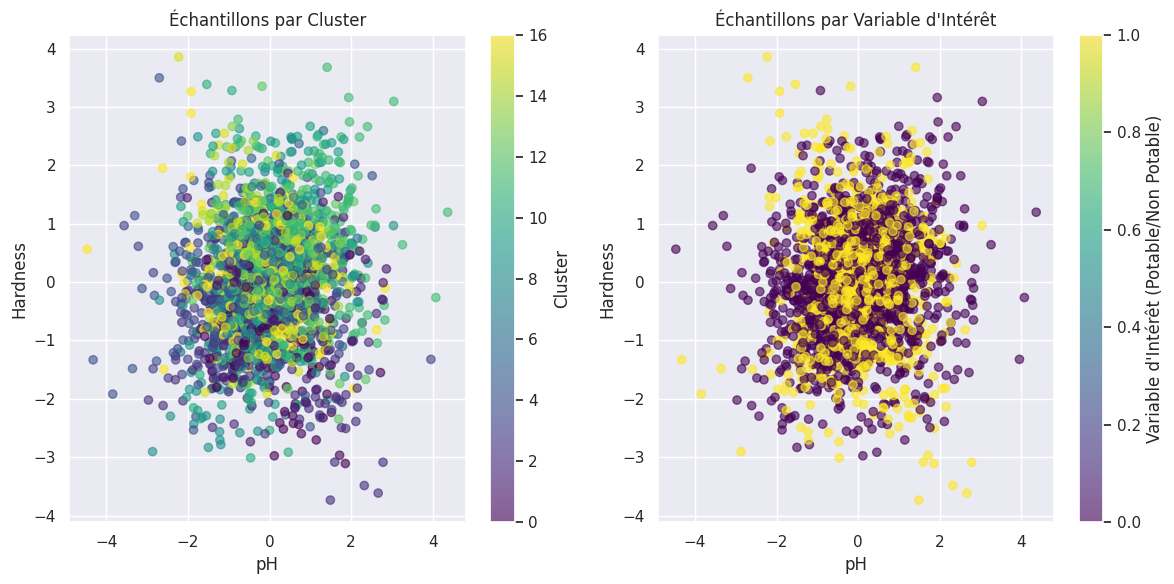

In [33]:
# Comparaison clusters SOM et variable d'interet 
from minisom import MiniSom
som = MiniSom(x=17, y=15, input_len=train_data.shape[1])

som.train_random(train_data, 200)

cluster_labels = np.array([som.winner(x) for x in train_data]).T

# Visualisation des clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(train_data[:, 0], train_data[:, 1], c=cluster_labels[0], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('pH')
plt.ylabel('Hardness')
plt.title('Échantillons par Cluster')

# Visualisation des échantillons par rapport à la variable d'intérêt
plt.subplot(1, 2, 2)
plt.scatter(train_data[:, 0], train_data[:, 1], c=target, cmap='viridis', alpha=0.6)
plt.colorbar(label='Variable d\'Intérêt (Potable/Non Potable)')
plt.xlabel('pH')
plt.ylabel('Hardness')
plt.title('Échantillons par Variable d\'Intérêt')

plt.tight_layout()
plt.show()


#### 2.3.2 Classification supervisées 

**K-Plus proche voisins**
Les paramètres : 
- n_neighbors : Pour déterminer le bon nombre de K nous allons réaliser une méthode de cross validation
- weights : Les 2 distances ont été testé et cela fonctionnait mieux avec un point uniforme (Valeur par default)
- metric : Toujours euclidienne pour l'obtenir nous devons laisser la metric minkowski par default avec p = 2 (Valeur par default également)

Pour cette partie je me suis aidé du tuto suivant : https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6075471698113207


Text(0, 0.5, 'Accuracy Score')

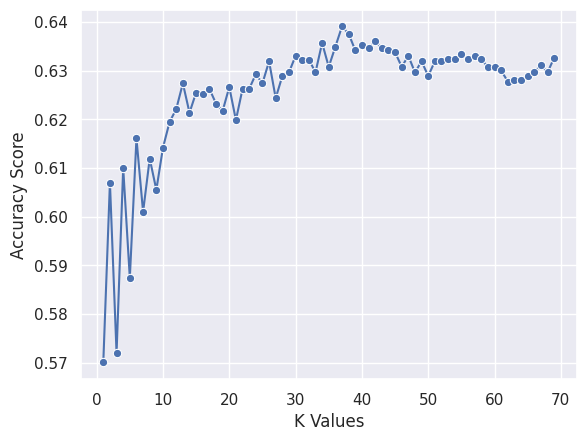

In [35]:
from sklearn.model_selection import cross_val_score

# Amélioration du score 
k_values = [i for i in range (1,70)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, train_data, target, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Le paramètre cv=5 indique que nous utilisons une validation croisée à 5 plis (5-fold cross-validation). Cela signifie que les données seront divisées en 5 parties, et le modèle sera entraîné et testé 5 fois, chaque fois avec une partie différente des données utilisée comme ensemble de test et les autres parties comme ensemble d'entraînement.

In [36]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Best K : ", best_k)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Best K :  37
Accuracy: 0.6320754716981132
Precision: 0.7543859649122807
Recall: 0.19196428571428573


Recall est le ratio de vrais positifs sur la somme des vrais positif et des faux négatifs => Capacité du modèle a identifier toute les instances positives 

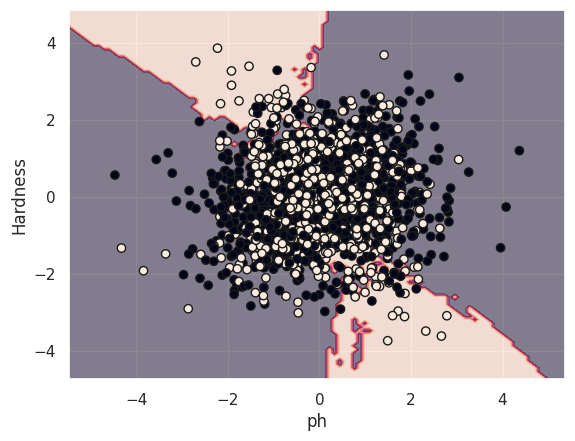

In [37]:
from sklearn.inspection import DecisionBoundaryDisplay

knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(train_data[:, :2], target)

disp = DecisionBoundaryDisplay.from_estimator(
    knn, train_data[:, :2], response_method="predict", alpha=0.5
)
disp.ax_.scatter(train_data[:, 0], train_data[:, 1], c=target, edgecolor="k")
plt.xlabel(colnames[0])
plt.ylabel(colnames[1])
plt.show()

La couleur des points (noir ou blanc) indique la classe ou la catégorie à laquelle chaque point de données appartient, selon la variable cible.
Les régions ombrées indiquent les zones où le modèle prédit une classe particulière. Par exemple, les points dans la région rouge seraient classés dans une classe, tandis que ceux dans la région bleue seraient classés dans une autre.

**Random Forest**
Urilisation du tuto suivant : https://www.datacamp.com/fr/tutorial/random-forests-classifier-python


In [44]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2)
clf = RandomForestClassifier(max_depth=2, random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6075471698113207


In [46]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f39bc6e2ad0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f39bca92d40>})

In [47]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 489}


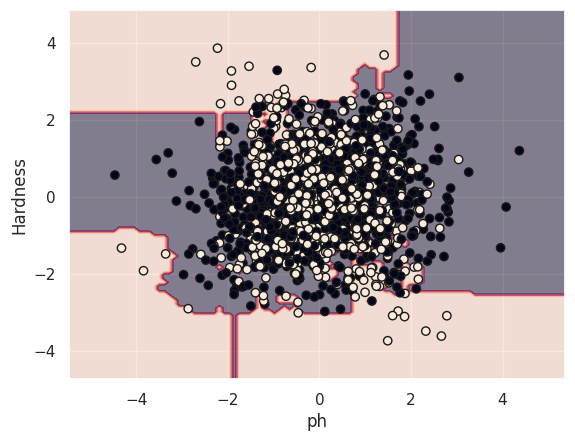

In [48]:

clf = RandomForestClassifier(max_depth=8,n_estimators=489, random_state=10)
clf.fit(train_data[:, :2], target)

disp = DecisionBoundaryDisplay.from_estimator(
    clf, train_data[:, :2], response_method="predict", alpha=0.5
)
disp.ax_.scatter(train_data[:, 0], train_data[:, 1], c=target, edgecolor="k")
plt.xlabel(colnames[0])
plt.ylabel(colnames[1])
plt.show()